In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import LabelEncoder

In [44]:
# Load data
data = pd.read_csv('Customer_data.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32 non-null     int64 
 1   Gender          32 non-null     object
 2   Annual Income   32 non-null     int64 
 3   Spending Score  32 non-null     int64 
 4   Region          32 non-null     object
dtypes: int64(3), object(2)
memory usage: 1.4+ KB
None
             Age  Annual Income  Spending Score
count  32.000000        32.0000       32.000000
mean   31.500000     70687.5000       71.437500
std     5.327954     13221.2866       10.232578
min    20.000000     48000.0000       55.000000
25%    28.000000     58750.0000       63.750000
50%    30.500000     70000.0000       70.000000
75%    36.250000     81500.0000       76.250000
max    41.000000     96000.0000       97.000000


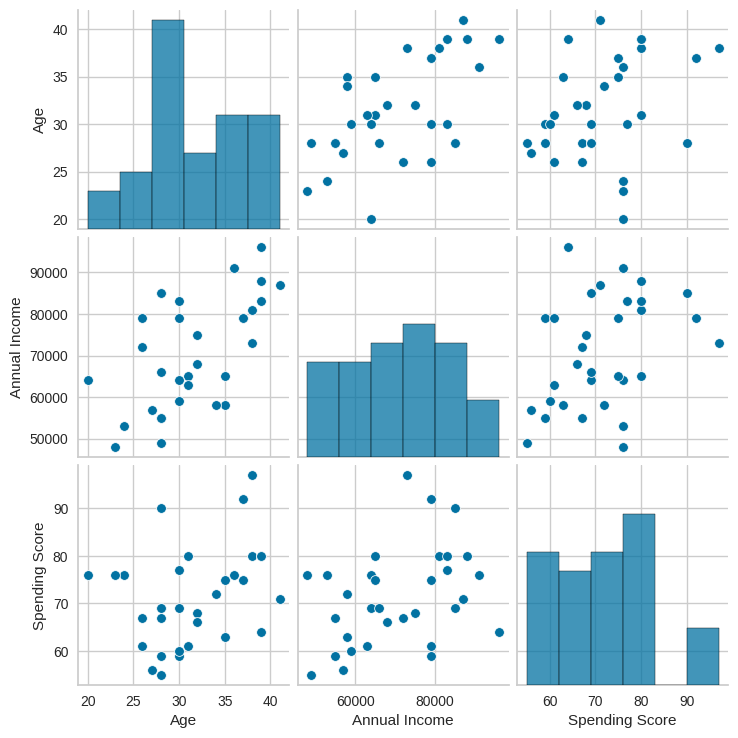

In [55]:
# Exploratory Data Analysis
print(data.info())
print(data.describe())
sns.pairplot(data)
plt.show()

In [56]:
# Handle missing values
data = data.dropna()

In [63]:
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

In [57]:

# Separate numerical and categorical features
numerical_cols = [col for col in data.columns if data[col].dtype in ['int64', 'float64']]
categorical_cols = [col for col in data.columns if col not in numerical_cols]

In [59]:
# Preprocess data
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


In [67]:
# Create a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clusterer', KMeans(n_clusters=optimal_k, n_init=10))  # Set n_init explicitly to suppress the warning
])


In [68]:
# Determine optimal number of clusters
silhouette_scores = []
calinski_scores = []
k_values = range(2, 11)

for k in k_values:
    pipeline.set_params(clusterer=KMeans(n_clusters=k, random_state=42))
    pipeline.fit(data)
    cluster_labels = pipeline.predict(data)
    silhouette_scores.append(silhouette_score(data, cluster_labels))
    calinski_scores.append(calinski_harabasz_score(data, cluster_labels))

optimal_k = k_values[np.argmax(silhouette_scores)]  # Choose optimal_k based on silhouette score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

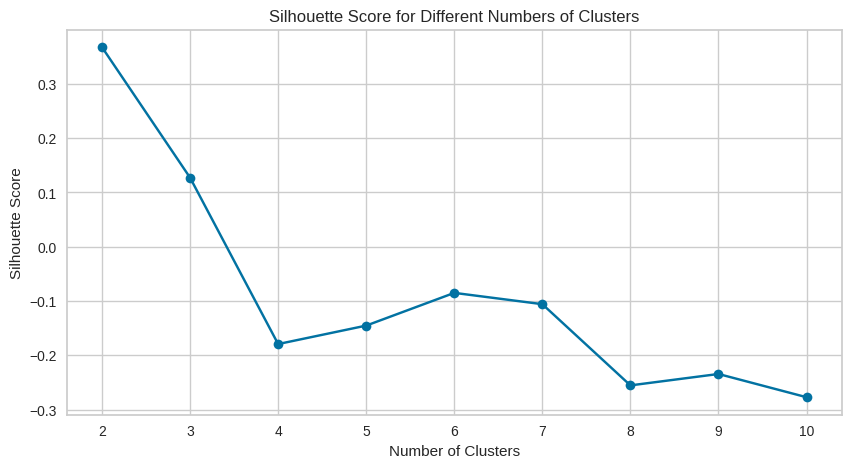

In [69]:
# Visualize silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()

In [ ]:
# Fit the K-Means model with optimal number of clusters
pipeline.set_params(clusterer=KMeans(n_clusters=optimal_k, random_state=42))
pipeline.fit(data)
cluster_labels = pipeline.predict(data)

In [76]:
# Transform the data using the preprocessor
transformed_data = pipeline.named_steps['preprocessor'].transform(data)

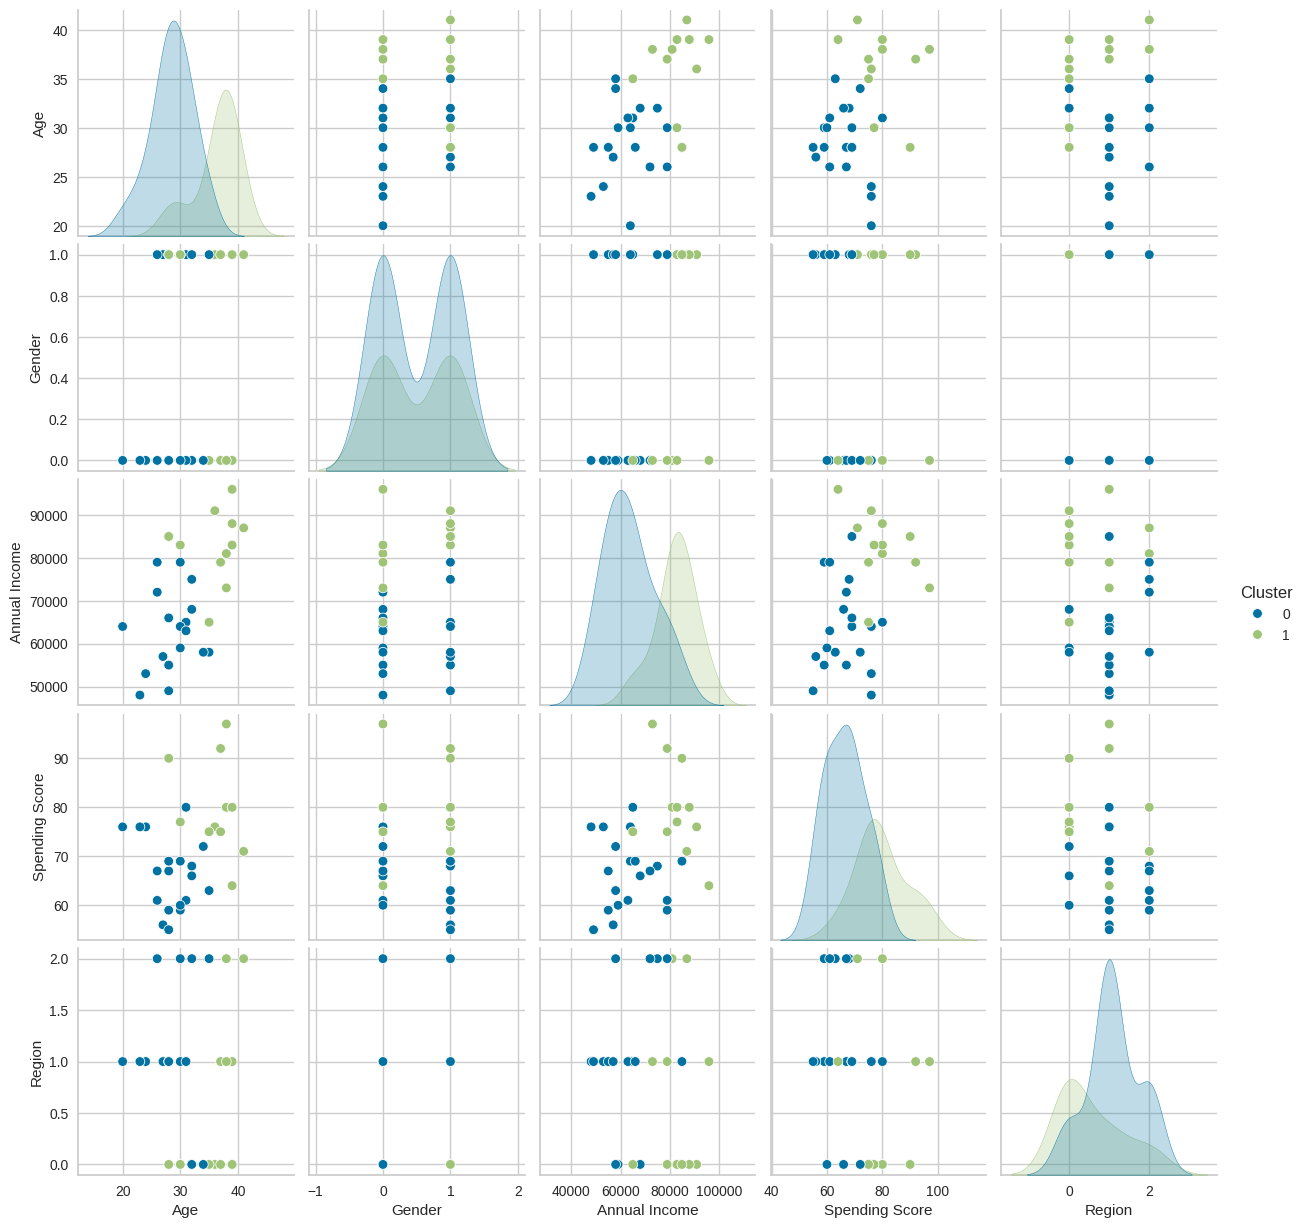

In [77]:
# Visualize clustering results
data['Cluster'] = cluster_labels
sns.pairplot(data, hue='Cluster')
plt.show()

In [72]:
# Analyze and interpret clusters
cluster_data = data.copy()
cluster_data['Cluster'] = cluster_labels
cluster_summary = cluster_data.groupby('Cluster').describe()
print(cluster_summary)


          Age                                                     Gender       \
        count       mean       std   min    25%   50%   75%   max  count mean   
Cluster                                                                         
0        20.0  28.550000  3.663116  20.0  26.75  28.0  31.0  35.0   20.0  0.5   
1        12.0  36.416667  3.824760  28.0  35.75  37.5  39.0  41.0   12.0  0.5   

         ... Spending Score       Region                                     \
         ...            75%   max  count      mean       std  min  25%  50%   
Cluster  ...                                                                  
0        ...          69.75  80.0   20.0  1.100000  0.640723  0.0  1.0  1.0   
1        ...          82.50  97.0   12.0  0.583333  0.792961  0.0  0.0  0.0   

                    
          75%  max  
Cluster             
0        1.25  2.0  
1        1.00  2.0  

[2 rows x 40 columns]


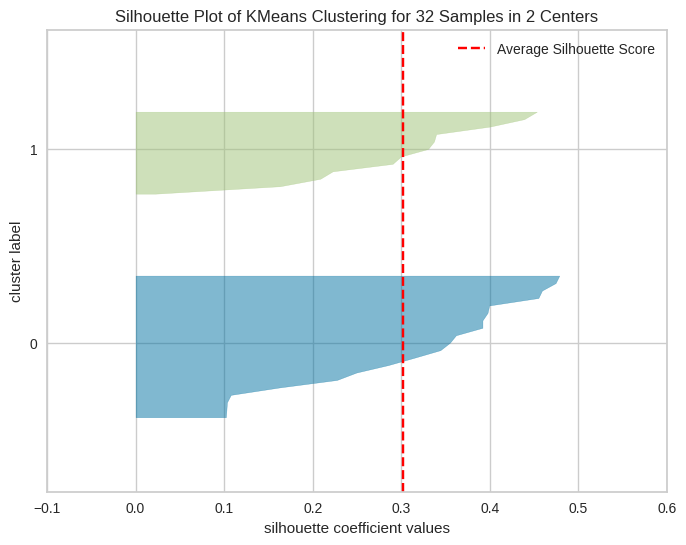

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 32 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [79]:
#Validate clustering using Silhouette visualization
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
visualizer = SilhouetteVisualizer(pipeline.named_steps['clusterer'], colors='yellowbrick')
visualizer.fit(transformed_data)  # Fit the visualizer with transformed data
visualizer.poof()